# 차원 축소

- 과일 사진의 경우 10000개의 픽셀이 있기 때문에 10000개의 특성이 있음

- 차원의 저주

    - 일반적인 머신러닝 문제는 수천 ~ 수백만 개의 특성을 가지는 경우도 있음
    - **특성이 너무 많으면** 훈련이 느리게 될 뿐 아니라 좋은 솔루션을 찾기 어렵게 됨

    - 이러한 문제를 **차원의 저주**라고 함

- 차원 축소(dimensionality reduction)
- 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 모델의 성느응ㄹ 향상시키는 바업ㅂ
- ex) 배경부분 제거, 서로 인접한 픽셀들을 결합 => 이건 뭐 다른 방식

## 주성분 분석(principal component analysis)

- 데이터에 있는 분산이 큰 방향을 찾는 것
- 분산 : 데이터가 퍼져 있는 정도

<img src ="image/pca1.gif">

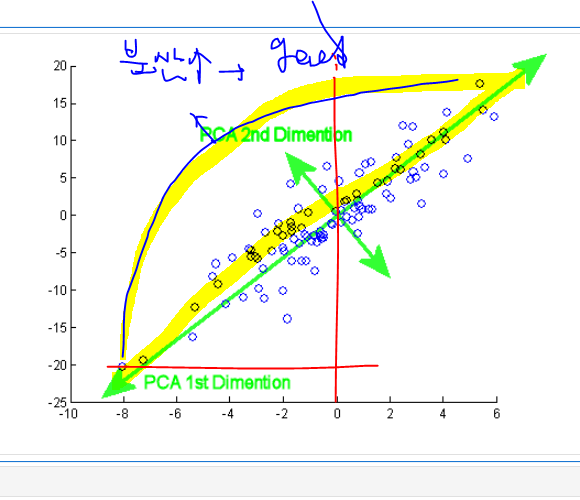

- 그냥 없애면 **데이터 소실**이 너무 커용
- 분산이 퍼져있는 방향 , 데이터의 특성을 더 잘보여주는 방향이라고 판단

- 위 그림의 데이터에서는 오른쪽 위를 향하는 분산이 가장 큼
- 원본 데이터를 가장 잘 설명하는 방향이 주성분(principal component)
    - 주성분은 데이터 가진 특성을 가장 잘 나타내기 때문에 주성분에 데이터를 투영하면 정보의 손실을 줄이면서 차원을 축소할 수 있음

<img src ="./image/pca2.png">

# PCA 만들기~

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans

In [5]:
fruits = np.load("./data/fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100 * 100)

In [6]:
pca = PCA(n_components=50) # n_components : 주성분의 개수~~~~~~~~~~(50차원의 공간에 투영시키겠다!)
pca.fit(fruits_2d)

PCA(n_components=50)

In [8]:
# pca가 찾은 주성분 확인
pca.components_.shape # 50개의 데이터가 10000개의 컬럼이 있음

(50, 10000)

# 함수 가져옴

In [9]:
def draw_fruits(arr, ratio = 1):
    n = len(arr) # 샘플 수

    # 한줄에 10개씩 이미지를 그릴 때, 몇 개 행이 필요할 지 행 개수 계산
    rows = int(np.ceil(n/10))
    cols = 10

    fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap = "gray_r")
            axs[i,j].axis("off")

    plt.show()

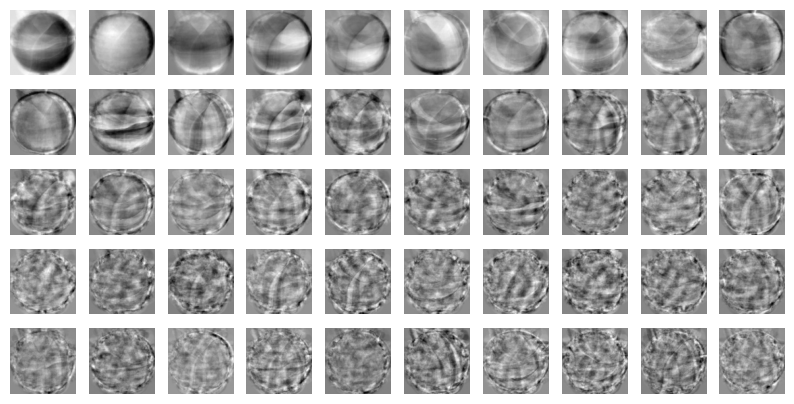

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

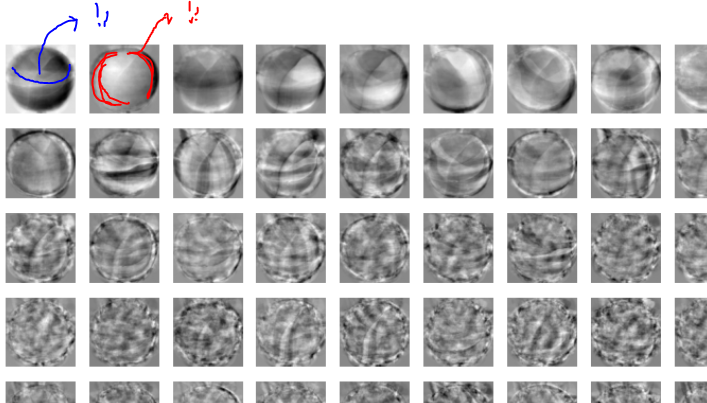

- 첫번째 녀석이 데이터의 특징을 잘 나타내는 친구구나!
- 둥글다! 원의 형태가 가지고 있는게 이 사과 데이터를 잘 나타내는구나!

- 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄
- 데이터셋에 있는 특징을 찾아낸 것

In [11]:
print(fruits_2d.shape)

(300, 10000)


In [12]:
# 원본 데이터의 차원을 50차원으로 축소
fruits_pca = pca.transform(fruits_2d)

In [13]:
fruits_pca.shape

(300, 50)

## 원본 데이터 재구성

- 10000개의 특성을 50개로 줄이면 정보 손실이 없을 수 없지만 정보 손실을 최소한으로했기 때문에 축소된 데이터에서 원본 데이터에 가깝게 복구할 수 있음

In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca)

In [15]:
print(fruits_inverse.shape)

(300, 10000)


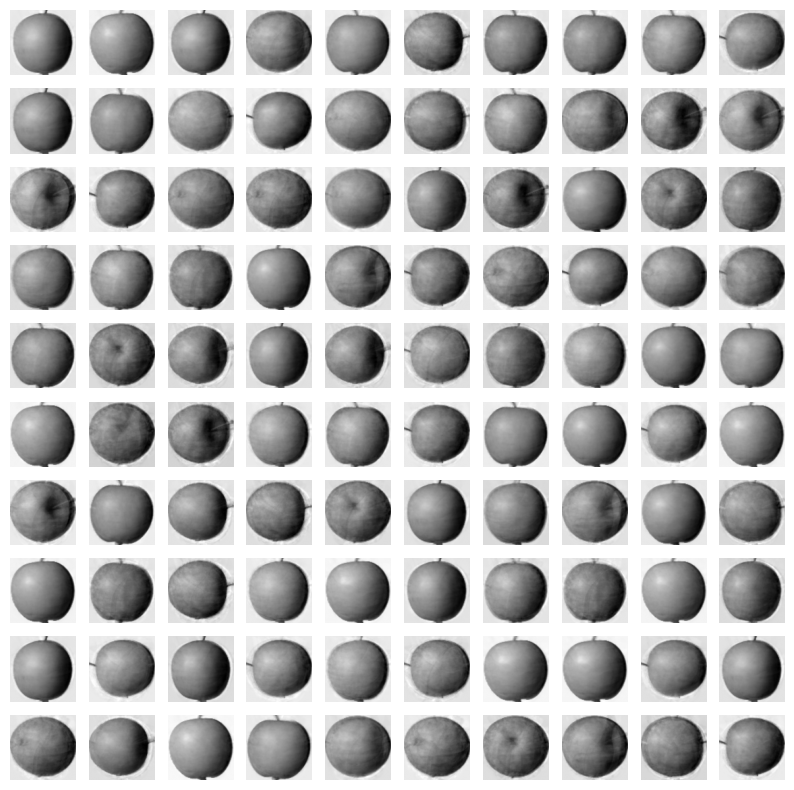

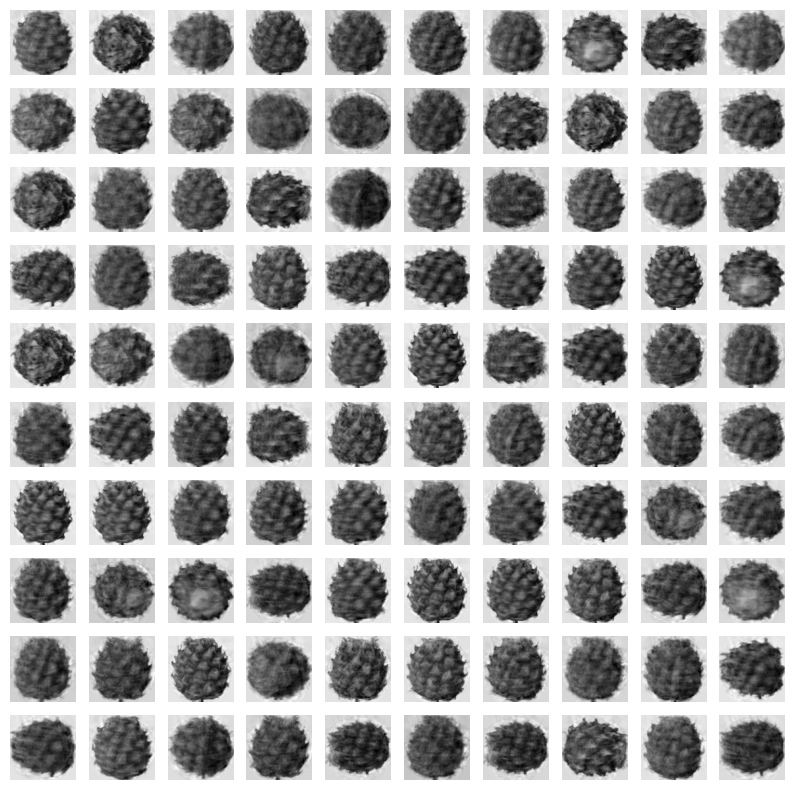

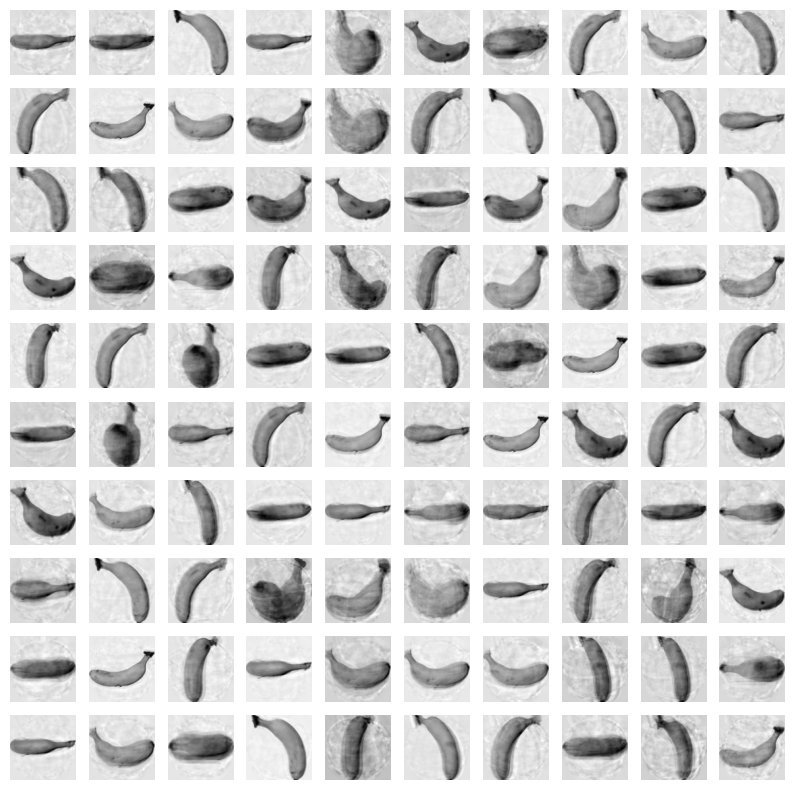

In [17]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start: start + 100])
    print()

## 설명된 분산(explained variance)

-  주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

-  pca 클래스의 explained_variance_ratio_ 에 설명된 분산 비율이 기록

In [18]:
#  50개의 주성분으로 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))

0.9215134897640173


In [20]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645189, 0.00578896, 0.00511202, 0.00486383, 0.00480343,
       0.00447832, 0.00437316, 0.00408036, 0.0038948 , 0.00372442,
       0.00359279, 0.00331463, 0.00317841, 0.00304304, 0.00303772,
       0.00288916, 0.00275779, 0.00264716, 0.00255745, 0.00251716,
       0.0024714 , 0.00239612, 0.00230699, 0.00221808, 0.00216658,
       0.00213581, 0.00195586, 0.00193004, 0.00190484, 0.0018389 ,
       0.00181194, 0.00173369, 0.0016767 , 0.00161719, 0.00160277])

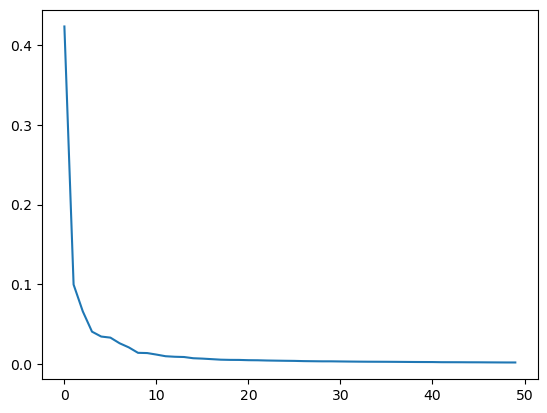

In [22]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

### 설명된 분산의 비율로 pca 사용

In [23]:
pca = PCA(n_components=0.75) # 75퍼 정도의 설명을 할 수 있는 주성분을 알아서 설정해줌

In [24]:
pca.fit(fruits_2d)

PCA(n_components=0.75)

In [26]:
pca.n_components_

np.int64(9)

- 9개의 주성분이 75퍼를 나타낸다

In [28]:
print(np.sum(pca.explained_variance_ratio_))

0.756065165999834


In [29]:
# 설명된 분산의 50% 에 달하는 주성분을 찾도록 설정 
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [30]:
pca.n_components_

np.int64(2)

- 2개의 차원으로 분산의 50%를 표현가능가능~~

# 다른 알고리즘과 함께 사용

In [33]:
# 레이블 생성

# 사과 = 0 , 파인애플 = 1, 바나나 = 2
y = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
lr = LogisticRegression()

In [36]:
# 원본 데이터로 성능 테스트
scores = cross_validate(lr, fruits_2d, y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.18607101440429688


In [37]:
fruits_pca.shape

(300, 50)

In [38]:
# pca 로 50개의 주성분으로 축소한 데이터로 성능 테스트
scores = cross_validate(lr, fruits_pca, y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.007499217987060547


# 2개의 주성분으로 차원축소 해보자

In [39]:
fruits_pca = pca.transform(fruits_2d)

In [40]:
print(fruits_pca.shape)

(300, 2)


In [42]:
scores = cross_validate(lr, fruits_pca, y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9933333333333334
0.016433238983154297


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

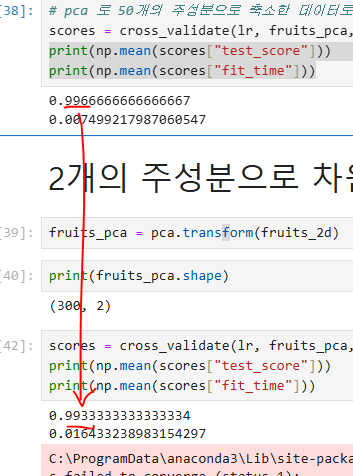

- 성능 차이 거의 없음 (떨어지긴했어도)

### 차원 축소된 데이터로 kmeans 사용

In [43]:
km = KMeans(n_clusters=3, random_state = 33)
km.fit(fruits_pca)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=33)

In [44]:
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


In [45]:
# 시각화가 가능하다

# 차원 축소된 데이터로 시각화

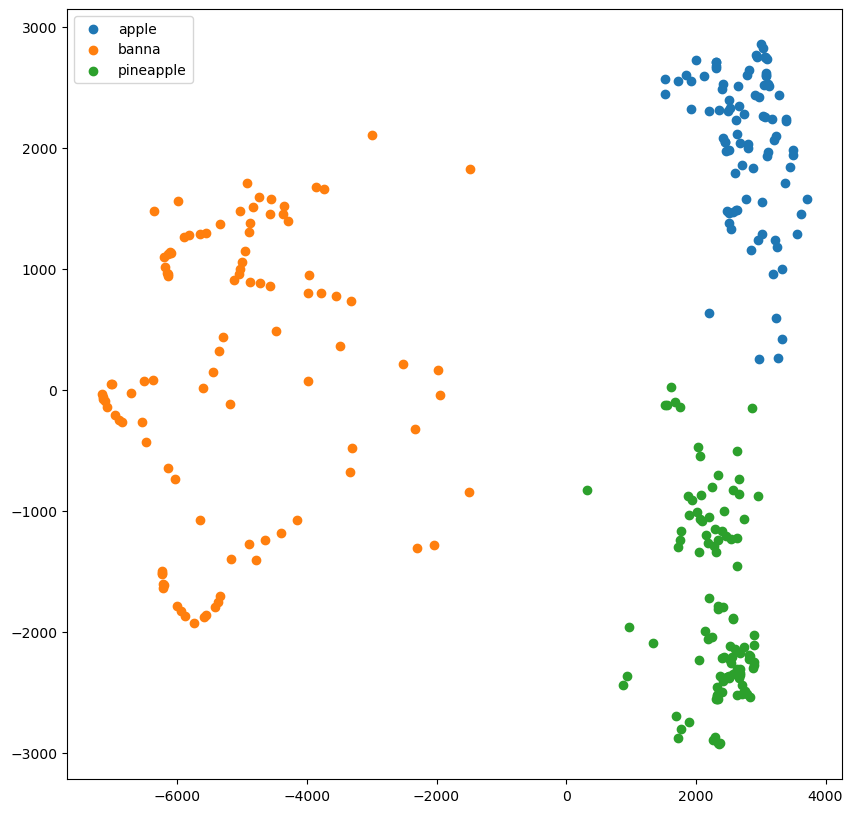

In [48]:
plt.figure(figsize = (10,10))
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])



plt.legend(["apple", "banna", "pineapple"])

plt.show()

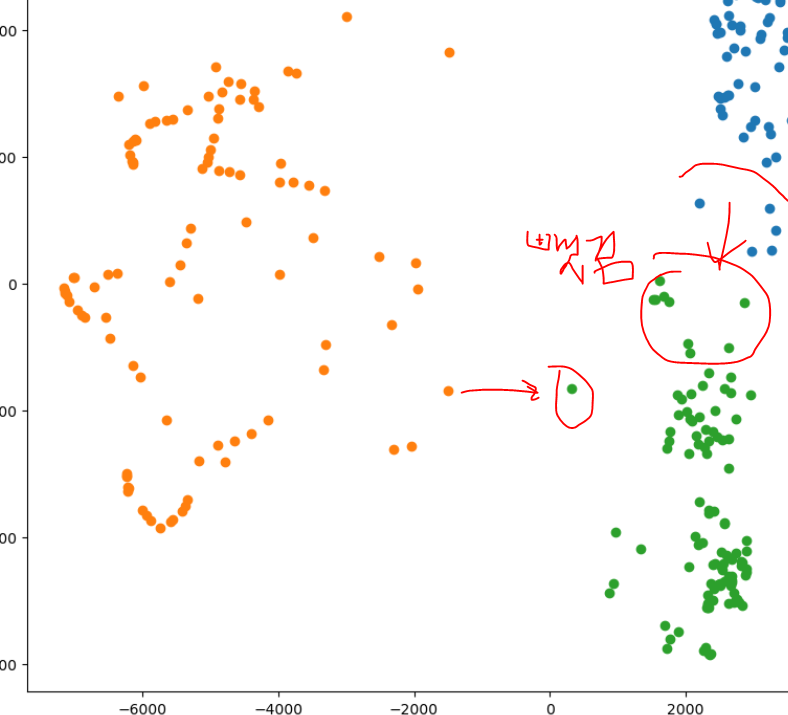

- 산점도 찍어서 뭐가 잘못군집되었나 판단...할 수 있다...

- 다차원 척도법이다!!!!!!!!!!!!!!!!!!!!